In [1]:
import nltk
import numpy as np
from collections import defaultdict, Counter

In [194]:
with open("masc_tag_dict.pickle","wb") as fh:
    pickle.dump(dict(penn_tags2phrases),fh,2)

In [189]:
corpus_reader = nltk.corpus.masc_tagged#nltk.corpus.treebank
penn_tags2phrases = defaultdict(set)

numeric_words = frozenset("am pm monday tuesday wednesday thursday friday saturday sunday january february march april may june july august september october november december".split(' '))
punctuation_tags = frozenset({',','.','SYM',"''",'``', ':'})
for sent in corpus_reader.tagged_sents():
    bad_count = 0#len([1 for word,tag in sent if tag=='NNP' or  tag=='CD' or word.lower() in numeric_words])
    word_count = 1#len([1 for word,tag in sent if not tag in punctuation_tags])
    if word_count>0 and bad_count/word_count<0.3:
        words, tags = zip(*sent)
        penn_tags2phrases[tags].add(words)

        

In [181]:

repeated_tags = frozenset([tags for (tags,sents) in penn_tags2phrases.items() if len(sents)>1 and len(tags)> 5])

tags2repeated_phrase = {tags:list(sents) for tags,sents in penn_tags2phrases.items() if tags in repeated_tags}
    

In [182]:
sum(map(len,tags2repeated_phrase.values()))

316

In [123]:
model = None
import pickle
with open("wiki_sentence_model.pickle", "br") as model_fs:
    model = pickle.load(model_fs)

In [183]:
tags = []
vectors = []
sents = []
for m_tags,tokenised_sents in tags2repeated_phrase.items():
    for tokenised_sent in tokenised_sents:
        tags.append(m_tags)
        
        sents.append(" ".join(tokenised_sent))
        vectors.append(model.infer_vector(tokenised_sent))
        
sents
    

["That 's correct , Your Honor .",
 'That is correct , Your Honor .',
 'You may call your next witness .',
 'They can make their own lysine .',
 'I laugh at their folly .',
 'I pray for my family .',
 'You get credit for trying .',
 'I know something about prosecuting .',
 'Woo , felt the tremor .',
 'Lipschitz , sighed the lady .',
 "I think it 's a fundamental difference .",
 "I think he 's a good person .",
 'We would just move on .',
 "We could n't get in .",
 'It reminded her of her mother .',
 'I gathered her under my arm .',
 "I 'll screw him , sir .",
 "I 'll twist him , sir .",
 'I ask you for your help .',
 'I ask you for your trust .',
 'SAMUEL PERKINS ( turning on the TV',
 'ALAN GRANT ( Searching for the word',
 '“ What do you mean ? ”',
 '“ What do you think ? ”',
 'We had a lot of devices .',
 'We discussed the representation for arrays .',
 'How do you see it ?',
 'How do I like them ?',
 'How do you know him ?',
 'Thank you for your time .',
 'Thank you for your cooper

In [184]:
import pylab as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 15, 15
from itertools import *
import functools

In [185]:
X=np.row_stack(vectors)

In [186]:
from sklearn.decomposition import PCA

pca = PCA(2)
Y = pca.fit_transform(X)

In [187]:
import matplotlib.cm as cm
lbls = tags


sorted_unique_lbls = np.unique(lbls)
try:
    sorted_unique_lbls.sort()
except:
    pass
color_names = cm.Dark2 (np.linspace(0, 1, len(sorted_unique_lbls)))
color_dict = dict(zip(sorted_unique_lbls, color_names))
colors = [color_dict[lbl] for lbl in lbls]

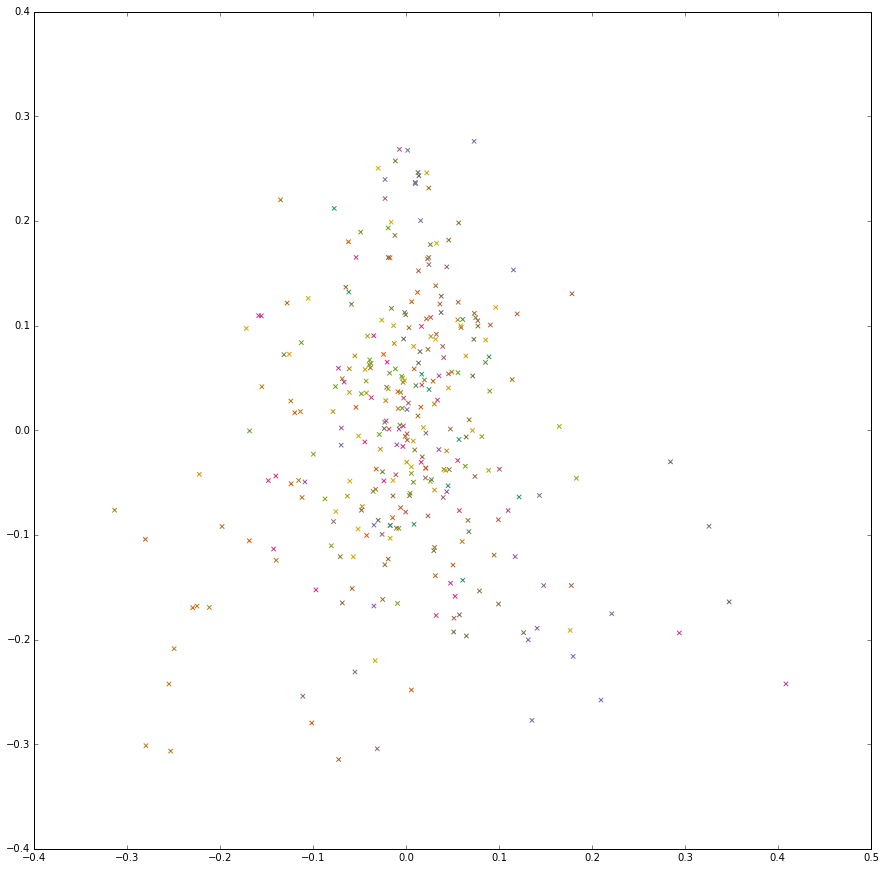

In [188]:
pl.scatter(x=Y[:,1],y=Y[:,0], c=colors, marker="x")